In [ ]:
# Data Reading
# Data Preprocessing - Hair Removal
# Create Hair removal function that will go through the sample dataset.

import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from utils.plots import get_image

In [23]:
def get_image_1(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    return image

def load_images_from_folder(folder):
    images=[]
    for filename in os.listdir(folder):
        full_path = folder + filename
        images.append(full_path)
    return images

In [24]:
path = "data/binary/train/sample_nevus_images/"
images_folder = load_images_from_folder(path)
images_folder

['data/binary/train/sample_nevus_images/nev00031.jpg',
 'data/binary/train/sample_nevus_images/nev00280.jpg',
 'data/binary/train/sample_nevus_images/nev00286.jpg',
 'data/binary/train/sample_nevus_images/nev00289.jpg',
 'data/binary/train/sample_nevus_images/nev00290.jpg',
 'data/binary/train/sample_nevus_images/nev00305.jpg',
 'data/binary/train/sample_nevus_images/nev00486.jpg',
 'data/binary/train/sample_nevus_images/nev00530.jpg',
 'data/binary/train/sample_nevus_images/nev00554.jpg',
 'data/binary/train/sample_nevus_images/nev00568.jpg',
 'data/binary/train/sample_nevus_images/nev00569.jpg']

In [58]:
def hair_removal(paths_list):
    # red channel used. after mask creation, opening + dilation is applied to extend the mask.
    count = 0
    for i in paths_list:
        # image= get_image(image_num, path)
        image = cv2.imread(i, cv2.IMREAD_COLOR)
        # red_channel
        red = image[:,:,2]
        # Black hat filter
        kernel = cv2.getStructuringElement(1,(20,20))
        blackhat = cv2.morphologyEx(red, cv2.MORPH_BLACKHAT, kernel)
        # Gaussian filter
        bhg= cv2.GaussianBlur(blackhat,(3,3),cv2.BORDER_DEFAULT)
        #Binary thresholding (MASK)
        ret,mask = cv2.threshold(bhg,10,255,cv2.THRESH_BINARY)

        # apply opening : erosion+dilation (remove the dots that are captured and then extend the hair parts)
        kernel_opening = np.ones((1, 1), np.uint8)
        opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel_opening)
        kernel_dilation = np.ones((5, 5), np.uint8)
        dilated_mask = cv2.dilate(opening, kernel_dilation, iterations=1)

        #Replace pixels of the mask
        dst = cv2.inpaint(image,dilated_mask,6,cv2.INPAINT_TELEA)

        count+=1

        cv2.imwrite(f'd_ex_{count}_org.png', image)
        cv2.imwrite(f'd_ex_{count}_after.png', dst)

        f, ax = plt.subplots(3, 2, figsize=(10,11))
        ax[0, 0].imshow(red, cmap='gray')
        ax[0, 0].axis('off')
        ax[0, 0].set_title("red ch 1")
        ax[1, 0].imshow(blackhat, cmap='gray')
        ax[1, 0].axis('off')
        ax[1, 0].set_title(f"blackhat 2")

        ax[2, 0].imshow(bhg, cmap='gray')
        ax[2, 0].axis('off')
        ax[2, 0].set_title("gaussian 3")
        ax[0, 1].imshow(mask, cmap='gray')
        ax[0, 1].axis('off')
        ax[0, 1].set_title(f"mask 4")

        ax[1, 1].imshow(opening, cmap='gray')
        ax[1, 1].axis('off')
        ax[1, 1].set_title("opening 5")
        ax[2, 1].imshow(dilated_mask, cmap='gray')
        ax[2, 1].axis('off')
        ax[2, 1].set_title(f"dilated_mask 6")

        plt.show()

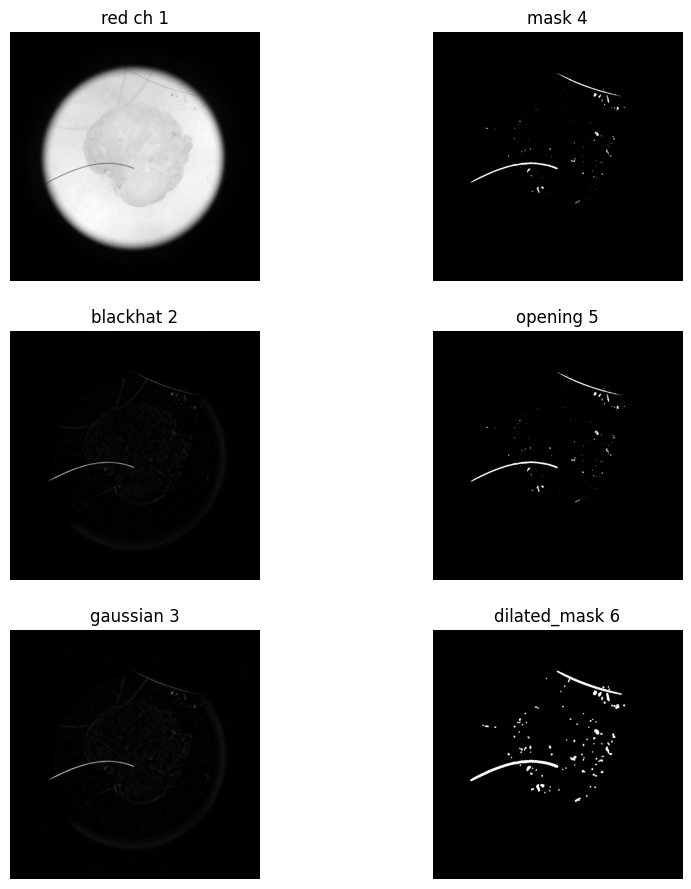

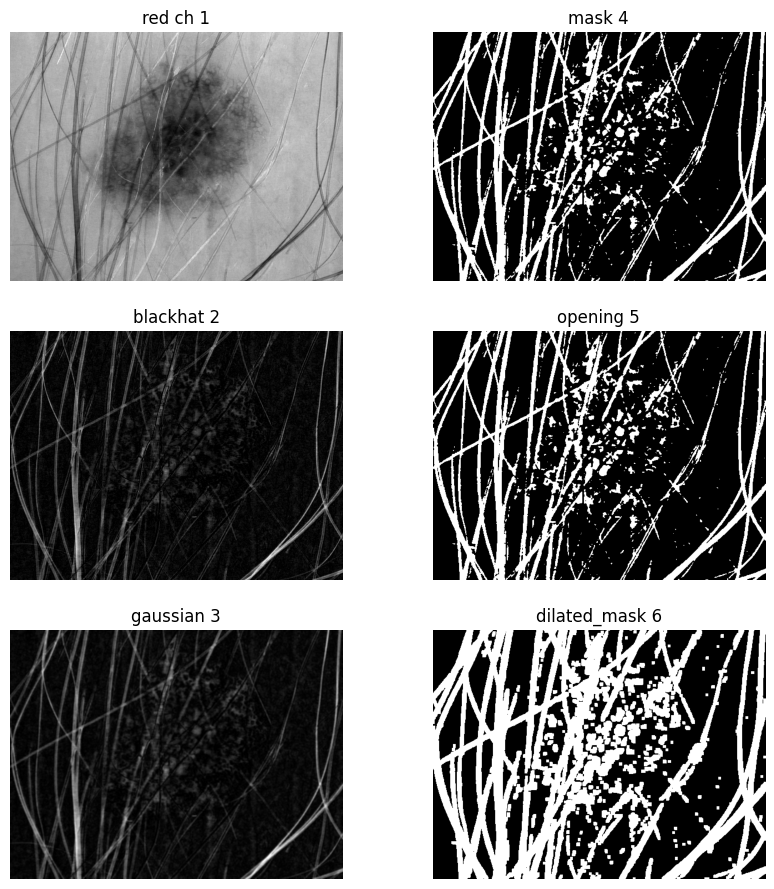

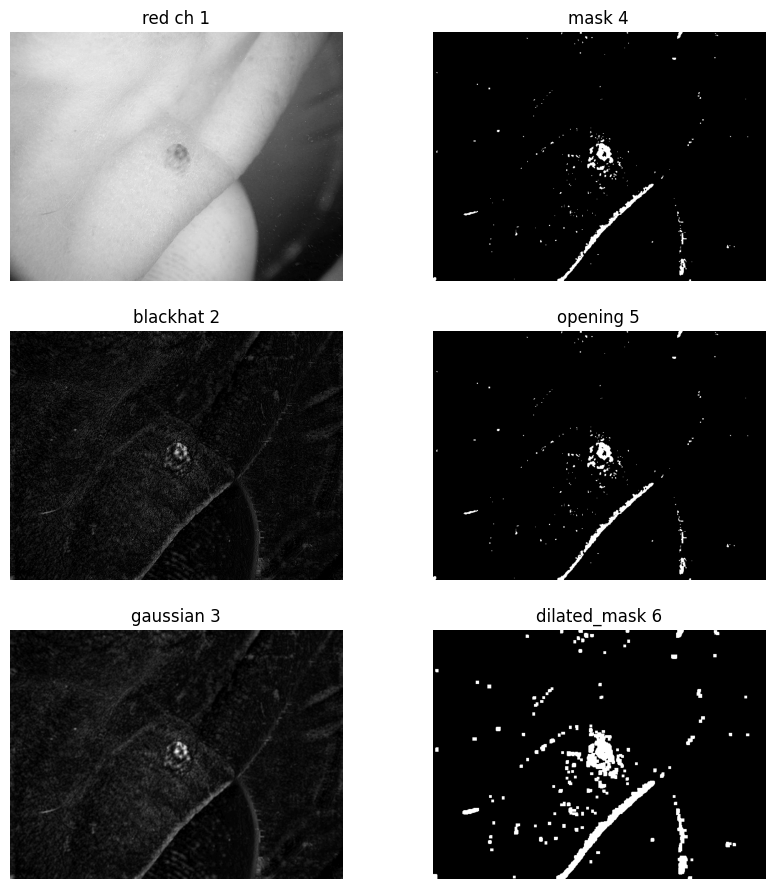

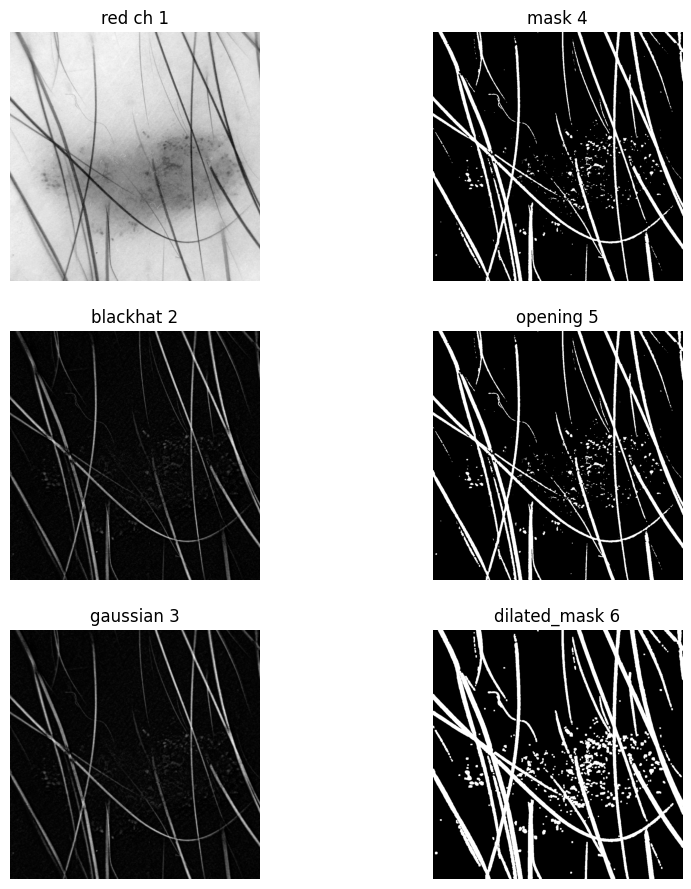

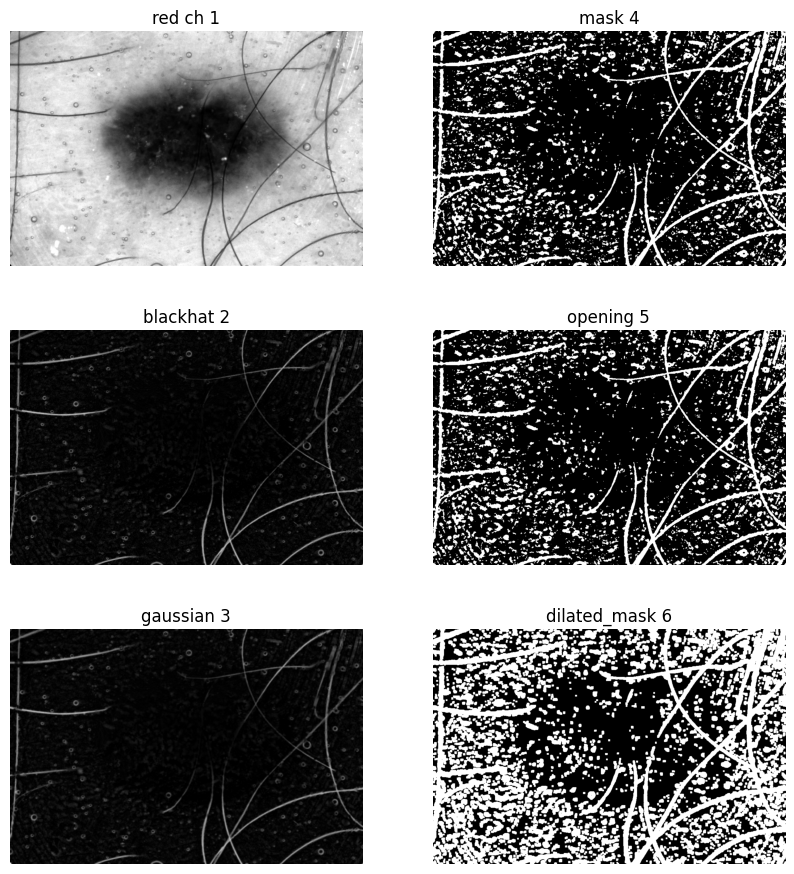

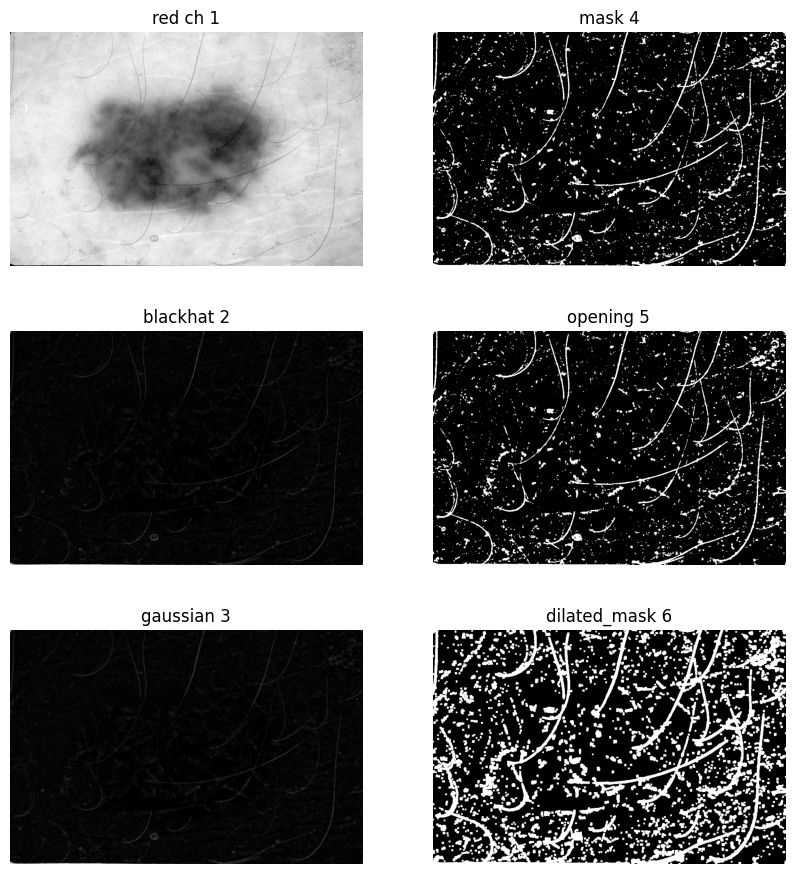

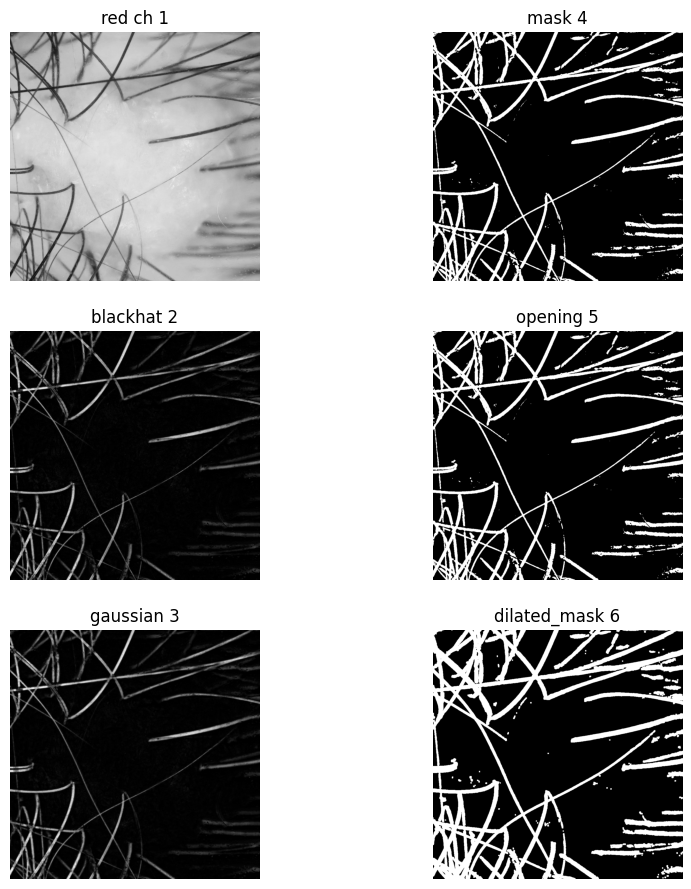

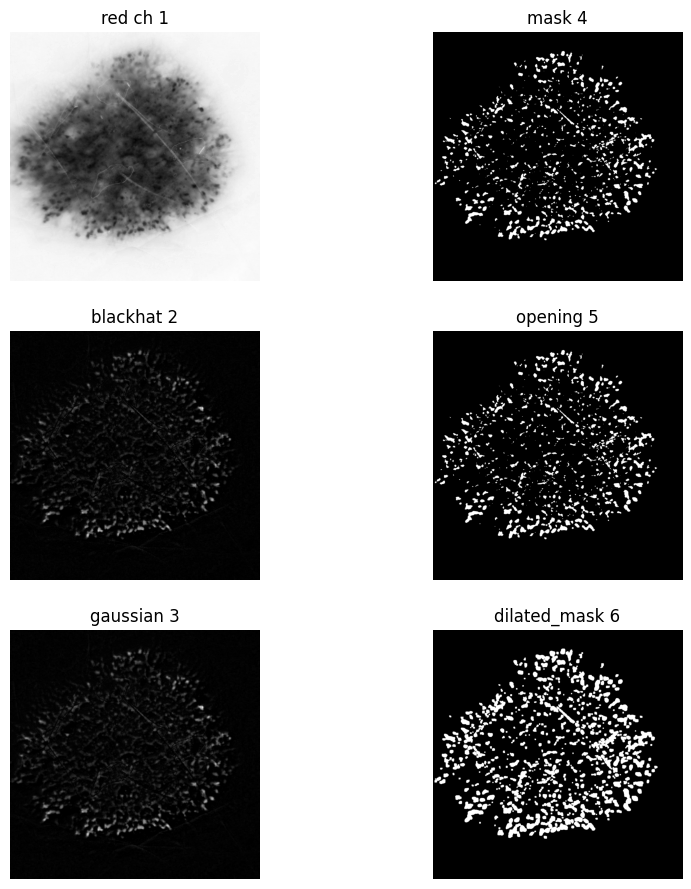

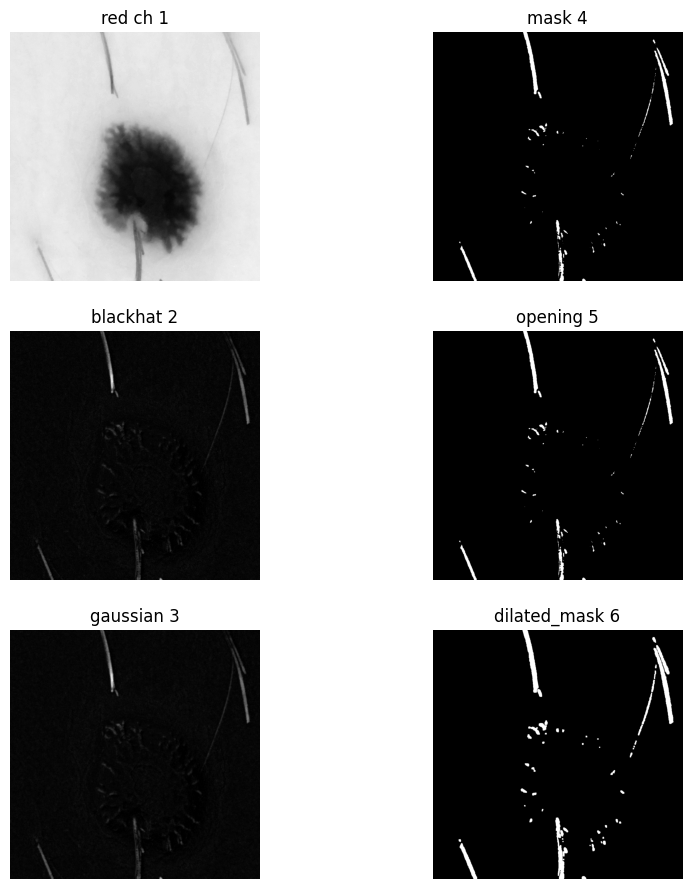

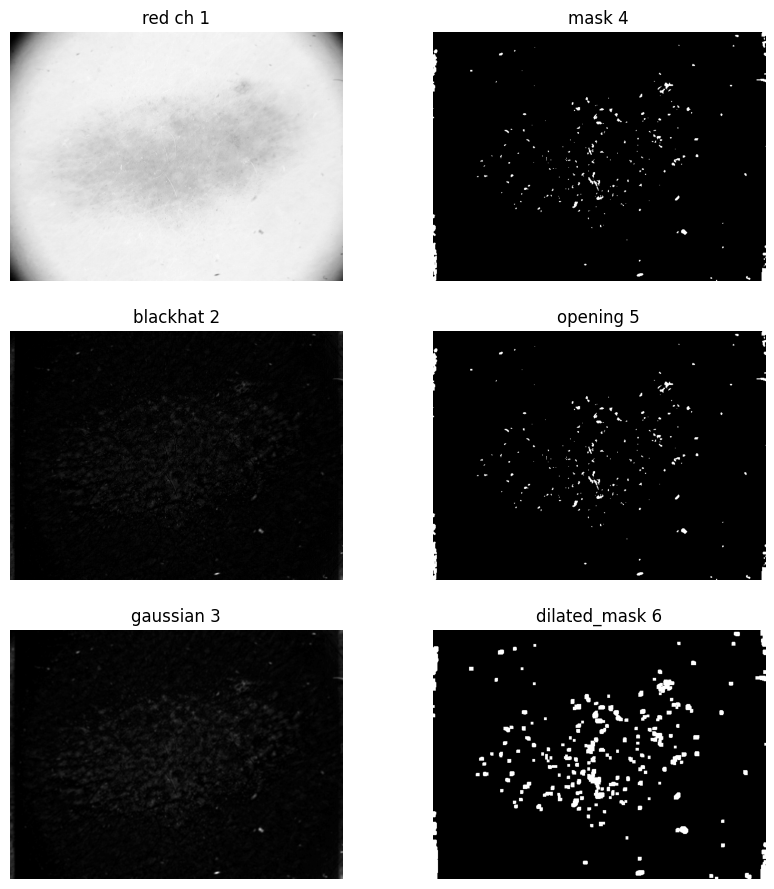

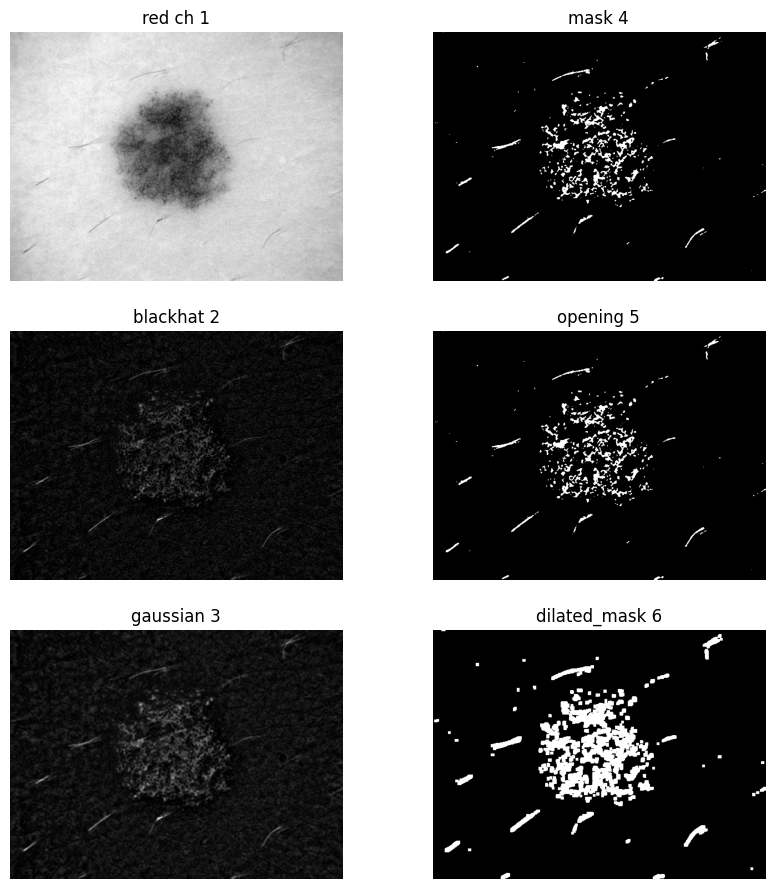

In [59]:
hair_removal(images_folder)